### Testing Financial Indicators


In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import joblib

# Import financial calculation library
import numpy_financial as npf



In [3]:
# Add path to simulation_engine module
import sys
from pathlib import Path

# Add the Indicator Modules directory to Python path
module_path = Path.cwd().parent.parent.parent / "Indicator Modules"
if str(module_path) not in sys.path:
    sys.path.insert(0, str(module_path))

print(f"Added to path: {module_path}")
print(f"Module exists: {module_path.exists()}")

Added to path: c:\Users\pthoeni\OneDrive - Scientific Network South Tyrol\Documents\ReLife\relife-financial-service\Indicator Modules
Module exists: True


In [6]:
# Import the simulation engine
from simulation_engine import run_simulation
from indicator_outputs import get_point_forecast, get_distribution_summary, get_indicator_probability, format_indicator_output
from visualizations import plot_indicator_distribution, plot_success_probabilities, plot_all_indicators, compare_indicators

print("✓ Successfully imported run_simulation from simulation_engine")

✓ Successfully imported run_simulation from simulation_engine


### "Private" Output

In [26]:
# Run simulation with loan scenario
# Input parameters
capex = 60000
annual_energy_savings = 27400
annual_maintenance_cost = 2000
project_lifetime = 20
loan_amount = 20000
loan_term = 15
loan_rate = 0.05  # 5% fixed interest rate

results = run_simulation(
    capex=capex,
    annual_maintenace_cost=annual_maintenance_cost,
    annual_energy_savings=annual_energy_savings,
    project_lifetime=project_lifetime,
    loan_amount=loan_amount,
    loan_term=loan_term,
    loan_rate=loan_rate,
    n_sims=10000,
    seed=42
)

print("Loan Scenario Simulation Complete!")
print(f"\n💰 LOAN DETAILS:")
print(f"  • Loan Amount: €{loan_amount:,}")
print(f"  • Interest Rate: {loan_rate:.1%}")
print(f"  • Loan Term: {loan_term} years")
print(f"\n📊 RESULTS:")
print(f"  • Median NPV: €{np.median(results['raw_data']['npv']):,.2f}")
print(f"  • Median IRR: {np.median(results['raw_data']['irr']):.2%}")
print(f"  • Median PBP: {np.median(results['raw_data']['pbp']):.1f} years")
print(f"  • Success Rate: {np.mean(results['raw_data']['npv'] > 0):.1%}")

# Extract raw data for visualizations
raw = results['raw_data']

Loan Scenario Simulation Complete!

💰 LOAN DETAILS:
  • Loan Amount: €20,000
  • Interest Rate: 5.0%
  • Loan Term: 15 years

📊 RESULTS:
  • Median NPV: €19,944.81
  • Median IRR: 9.51%
  • Median PBP: 9.8 years
  • Success Rate: 99.8%


#### 1. Most Significant & Intuitive Indicators (Medians)

In [27]:
# Extract medians for the most intuitive indicators for homeowners
# Access raw_data from results structure
raw = results['raw_data']

private_indicators = {
    "NPV (Total Savings)": np.median(raw['npv']),
    "PBP (Payback Period)": np.median(raw['pbp']),
    "ROI (Return on Investment)": np.median(raw['roi'])
}

# Format for display
print("=" * 60)
print("PRIVATE USER OUTPUT - Key Financial Metrics (Median Values)")
print("=" * 60)
print(f"\n💰 Total Net Profit (NPV):     €{private_indicators['NPV (Total Savings)']:,.2f}")
print(f"⏱️  Payback Period (PBP):      {private_indicators['PBP (Payback Period)']:.1f} years")
print(f"📈 Return on Investment (ROI): {private_indicators['ROI (Return on Investment)']:.1%}")
print("=" * 60)

# Also calculate success probability
success_rate = np.mean(raw['npv'] > 0)
print(f"\n✅ Success Probability: {success_rate:.0%} chance of positive return")

PRIVATE USER OUTPUT - Key Financial Metrics (Median Values)

💰 Total Net Profit (NPV):     €19,944.81
⏱️  Payback Period (PBP):      9.8 years
📈 Return on Investment (ROI): 156.9%

✅ Success Probability: 100% chance of positive return


#### 2. Visualizations - NPV Distribution

Shows the range of possible profit outcomes with P10/P50/P90 percentiles.

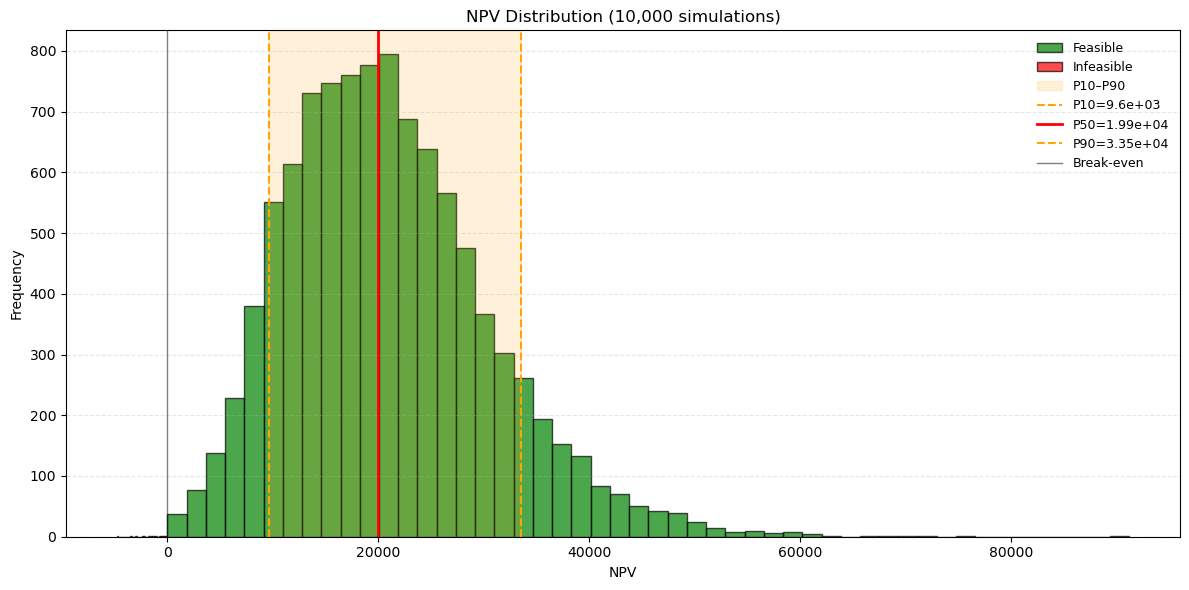

<Figure size 640x480 with 0 Axes>


💡 Interpretation:
  - Green bars: Scenarios with positive return (profitable)
  - Red bars: Scenarios with negative return (loss)
  - P10: 10% of scenarios are worse than this
  - P50: Median outcome (50% above, 50% below)
  - P90: 90% of scenarios are worse than this


In [28]:
# Plot NPV distribution - Shows range of profit outcomes
plot_indicator_distribution(
    simulation_results=results,
    indicator='NPV',
    figsize=(12, 6),
    color='green',
    show_plot=True
)

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("  - Green bars: Scenarios with positive return (profitable)")
print("  - Red bars: Scenarios with negative return (loss)")
print("  - P10: 10% of scenarios are worse than this")
print("  - P50: Median outcome (50% above, 50% below)")
print("  - P90: 90% of scenarios are worse than this")

#### VIZ 1: Cash Flow Timeline - "When Do I Start Making Money?"

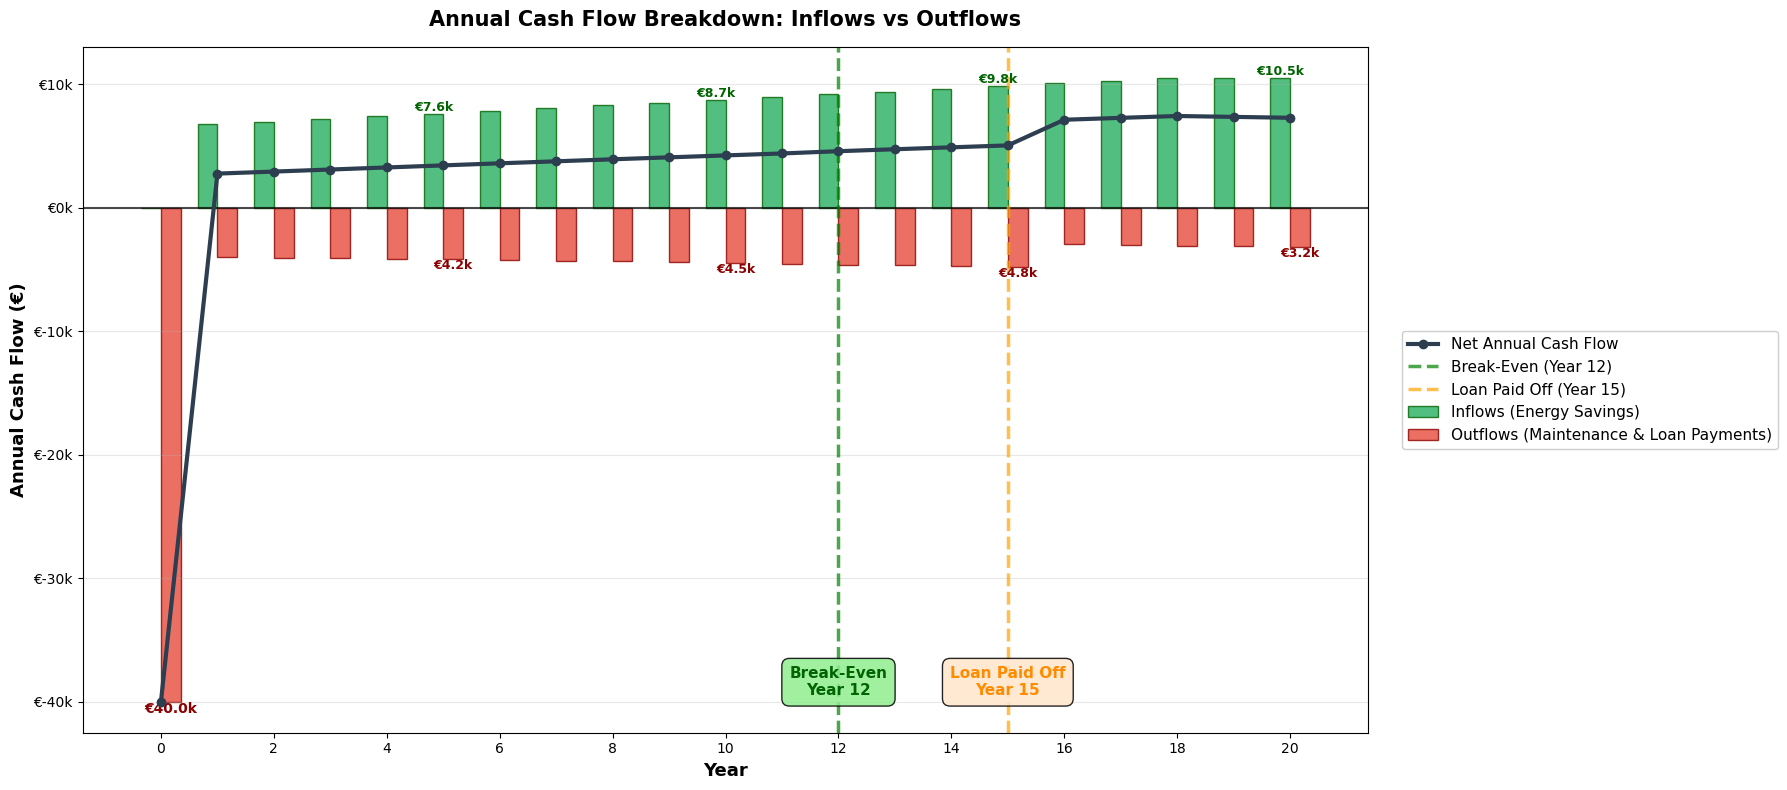


PROJECT LIFECYCLE SUMMARY

💰 INVESTMENT DETAILS:
  • Total Investment (CAPEX): €60,000
  • Loan Amount: €20,000
  • Out-of-Pocket (Year 0): €40,000
  • Loan Interest Rate: 5.0%
  • Loan Term: 15 years
  • Annual Loan Payment: €1,926.85

📅 TIMELINE:
  • Year 0: Initial out-of-pocket investment of €40,000
  • Years 1-20: Operating period
  • Year 15: Loan fully paid off 💳
  • Year 12: Break-even point reached ✅
  • Years 13-20: Pure profit period 💰

💵 ANNUAL CASH FLOWS (Median Scenario):
  • Year 1:  Revenue €6,740 - OPEX €2,060 - Loan €1,927 = Net €2,754
  • Year 10: Revenue €8,713 - OPEX €2,560 - Loan €1,927 = Net €4,226
  • Year 20: Revenue €10,494 - OPEX €3,220 - Loan €0 = Net €7,274

📊 TOTALS OVER 20 YEARS:
  • Total Inflows:  €176,045
  • Total Outflows: €121,065
    - Initial Investment: €40,000
    - Maintenance (20 years): €52,163
    - Loan Payments (15 years): €28,903
  • Net Profit:     €54,980

🎯 KEY METRICS:
  • Simple Payback Period: 12 years
  • Average Annual Profit: €4

In [29]:
# Enhanced Cash Flow Visualization: Annual Inflows vs Outflows

# Check if results exist
if 'results' not in locals():
    raise NameError("Variable 'results' is not defined. Please run the cell that performs the Monte Carlo simulation first.")

# Get market distributions
market_dist = results['market_distributions']
raw = results['raw_data']

# Calculate using median market values
median_elec_prices = np.exp(market_dist['elec_price']['mu_ln'])
median_inflation = market_dist['inflation']['mu']

# Calculate detailed annual cash flows
years_operational = np.arange(1, project_lifetime + 1)

# INFLOWS: Energy savings value (revenue)
annual_revenues = annual_energy_savings * median_elec_prices[:project_lifetime]

# OUTFLOWS: Maintenance costs (inflated over time)
annual_opex = np.array([annual_maintenance_cost * np.prod([1 + median_inflation[j]/100 for j in range(i+1)]) 
                        for i in range(project_lifetime)])

# OUTFLOWS: Loan payments (if loan exists)
if loan_amount > 0 and loan_term > 0:
    # Calculate annual loan payment using PMT formula
    # PMT = P * (r * (1 + r)^n) / ((1 + r)^n - 1)
    annual_loan_payment = npf.pmt(loan_rate, loan_term, -loan_amount)
    
    # Create array of loan payments (only for loan term years)
    annual_loan_payments = np.zeros(project_lifetime)
    annual_loan_payments[:loan_term] = annual_loan_payment
else:
    annual_loan_payments = np.zeros(project_lifetime)

# Total annual outflows (maintenance + loan payments)
total_annual_outflows = annual_opex + annual_loan_payments

# Net cash flow per year (operational years only)
annual_net_cf = annual_revenues - total_annual_outflows

# Cumulative position (for break-even calculation)
cumulative_position = np.zeros(project_lifetime + 1)
cumulative_position[0] = -(capex - loan_amount)  # Year 0: Out-of-pocket investment
for i in range(project_lifetime):
    cumulative_position[i+1] = cumulative_position[i] + annual_net_cf[i]

# Find break-even year
breakeven_year = np.where(cumulative_position >= 0)[0][0] if any(cumulative_position >= 0) else None

# Create single figure for annual cash flows
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

# Prepare x-axis including year 0
years_all = np.arange(0, project_lifetime + 1)
bar_width = 0.35

# ======================== ANNUAL CASH FLOWS (including Year 0) ========================

# Year 0: Initial out-of-pocket investment
initial_investment = -(capex - loan_amount)

# Combine year 0 with operational years for plotting
all_inflows = np.concatenate([[0], annual_revenues])  # Year 0 has no inflows
all_outflows = np.concatenate([[initial_investment], -total_annual_outflows])  # Year 0 has investment outflow
all_net_cf = np.concatenate([[initial_investment], annual_net_cf])  # Net cash flow including year 0

x_pos = np.arange(len(years_all))

# Plot inflows (positive)
bars_inflow = ax.bar(x_pos - bar_width/2, all_inflows, bar_width, 
                      label='Inflows (Energy Savings)', 
                      color='#27ae60', alpha=0.8, edgecolor='darkgreen')

# Plot outflows (negative)
bars_outflow = ax.bar(x_pos + bar_width/2, all_outflows, bar_width,
                       label='Outflows (Maintenance & Loan Payments)', 
                       color='#e74c3c', alpha=0.8, edgecolor='darkred')

# Add net cash flow as a line
ax.plot(x_pos, all_net_cf, color='#2c3e50', linewidth=3, marker='o', 
         markersize=6, label='Net Annual Cash Flow', zorder=5)

# Add zero line
ax.axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.7)

# Get y-axis limits for positioning annotations at bottom
y_min, y_max = ax.get_ylim()

# Add vertical line for break-even point
if breakeven_year:
    ax.axvline(x=breakeven_year, color='green', linestyle='--', linewidth=2.5, 
               alpha=0.7, label=f'Break-Even (Year {breakeven_year})')
    # Add text annotation at bottom
    ax.text(breakeven_year, y_min + (y_max - y_min)*0.05, f'Break-Even\nYear {breakeven_year}',
           ha='center', va='bottom', fontsize=11, fontweight='bold', color='darkgreen',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.85))

# Add vertical line for loan term end (if loan exists)
if loan_amount > 0 and loan_term > 0:
    ax.axvline(x=loan_term, color='orange', linestyle='--', linewidth=2.5, 
               alpha=0.7, label=f'Loan Paid Off (Year {loan_term})')
    # Add text annotation at bottom
    ax.text(loan_term, y_min + (y_max - y_min)*0.05, f'Loan Paid Off\nYear {loan_term}',
           ha='center', va='bottom', fontsize=11, fontweight='bold', color='darkorange',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='#ffe6cc', alpha=0.85))

# Add value labels on bars (every 5 years to avoid clutter)
for i in range(0, len(years_all), 5):
    if i == 0:  # Year 0 special label
        ax.text(i + bar_width/2, all_outflows[i], f'€{-all_outflows[i]/1000:.1f}k',
               ha='center', va='top', fontsize=10, fontweight='bold', color='darkred')
    else:
        # Inflow label
        ax.text(i - bar_width/2, all_inflows[i], f'€{all_inflows[i]/1000:.1f}k',
               ha='center', va='bottom', fontsize=9, fontweight='bold', color='darkgreen')
        # Outflow label
        ax.text(i + bar_width/2, all_outflows[i], f'€{-all_outflows[i]/1000:.1f}k',
               ha='center', va='top', fontsize=9, fontweight='bold', color='darkred')

# Formatting
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Annual Cash Flow (€)', fontsize=13, fontweight='bold')
ax.set_title('Annual Cash Flow Breakdown: Inflows vs Outflows', 
             fontsize=15, fontweight='bold', pad=15)

# Move legend outside the plot area (to the right)
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=11, framealpha=0.95)

ax.grid(True, alpha=0.3, axis='y')
ax.set_xticks(x_pos[::2])
ax.set_xticklabels(years_all[::2])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1000:.0f}k'))

plt.tight_layout()
plt.show()

# =================== SUMMARY TABLE ===================
print("\n" + "=" * 80)
print("PROJECT LIFECYCLE SUMMARY")
print("=" * 80)

print(f"\n💰 INVESTMENT DETAILS:")
print(f"  • Total Investment (CAPEX): €{capex:,}")
print(f"  • Loan Amount: €{loan_amount:,}")
print(f"  • Out-of-Pocket (Year 0): €{capex - loan_amount:,}")
if loan_amount > 0:
    print(f"  • Loan Interest Rate: {loan_rate:.1%}")
    print(f"  • Loan Term: {loan_term} years")
    print(f"  • Annual Loan Payment: €{annual_loan_payment:,.2f}")

print(f"\n📅 TIMELINE:")
print(f"  • Year 0: Initial out-of-pocket investment of €{capex - loan_amount:,}")
print(f"  • Years 1-{project_lifetime}: Operating period")
if loan_amount > 0 and loan_term > 0:
    print(f"  • Year {loan_term}: Loan fully paid off 💳")
if breakeven_year:
    print(f"  • Year {breakeven_year}: Break-even point reached ✅")
    print(f"  • Years {breakeven_year+1}-{project_lifetime}: Pure profit period 💰")

print(f"\n💵 ANNUAL CASH FLOWS (Median Scenario):")
print(f"  • Year 1:  Revenue €{annual_revenues[0]:,.0f} - OPEX €{annual_opex[0]:,.0f} - Loan €{annual_loan_payments[0]:,.0f} = Net €{annual_net_cf[0]:,.0f}")
print(f"  • Year 10: Revenue €{annual_revenues[9]:,.0f} - OPEX €{annual_opex[9]:,.0f} - Loan €{annual_loan_payments[9]:,.0f} = Net €{annual_net_cf[9]:,.0f}")
print(f"  • Year 20: Revenue €{annual_revenues[-1]:,.0f} - OPEX €{annual_opex[-1]:,.0f} - Loan €{annual_loan_payments[-1]:,.0f} = Net €{annual_net_cf[-1]:,.0f}")

print(f"\n📊 TOTALS OVER {project_lifetime} YEARS:")
print(f"  • Total Inflows:  €{np.sum(annual_revenues):,.0f}")
print(f"  • Total Outflows: €{(capex - loan_amount) + np.sum(annual_opex) + np.sum(annual_loan_payments):,.0f}")
print(f"    - Initial Investment: €{capex - loan_amount:,.0f}")
print(f"    - Maintenance (20 years): €{np.sum(annual_opex):,.0f}")
print(f"    - Loan Payments ({loan_term} years): €{np.sum(annual_loan_payments):,.0f}")
print(f"  • Net Profit:     €{cumulative_position[-1]:,.0f}")

print(f"\n🎯 KEY METRICS:")
print(f"  • Simple Payback Period: {breakeven_year if breakeven_year else 'N/A'} years")
print(f"  • Average Annual Profit: €{np.mean(annual_net_cf):,.0f}")
print(f"  • Total ROI: {(cumulative_position[-1]/(capex - loan_amount))*100:.1f}%")
print(f"  • IRR: {np.median(raw['irr']):.2%}")

print("=" * 80)